<a href="https://colab.research.google.com/github/ChaaruVijay/DSPL-CourseWork/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

In [ ]:
df=pd.read_csv('traincsv cleaned III.csv')

In [ ]:
target_col='cluster_catgeory'
y=df[target_col]
X=df.drop(columns=[target_col])

In [ ]:
# (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Train Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)

In [ ]:
# Evaluate Classification Model
print("Classification Report:\n", classification_report(y_test, y_pred_clf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_clf))

Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     56687
         2.0       1.00      1.00      1.00     46511
         3.0       1.00      1.00      1.00     14666
         4.0       1.00      1.00      1.00     37812
         5.0       1.00      1.00      1.00     11858
         6.0       1.00      1.00      1.00     50761

    accuracy                           1.00    218295
   macro avg       1.00      1.00      1.00    218295
weighted avg       1.00      1.00      1.00    218295

Confusion Matrix:
 [[56582     3     3    95     3     1]
 [    1 46411     3     3     3    90]
 [    6     2 14638     2    13     5]
 [  112     3     0 37691     4     2]
 [    1     0    13     9 11831     4]
 [    6    90     2     2     2 50659]]


In [ ]:
# Compute ROC-AUC for multi-class classification
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_pred_proba = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average='macro', multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9986503238850105


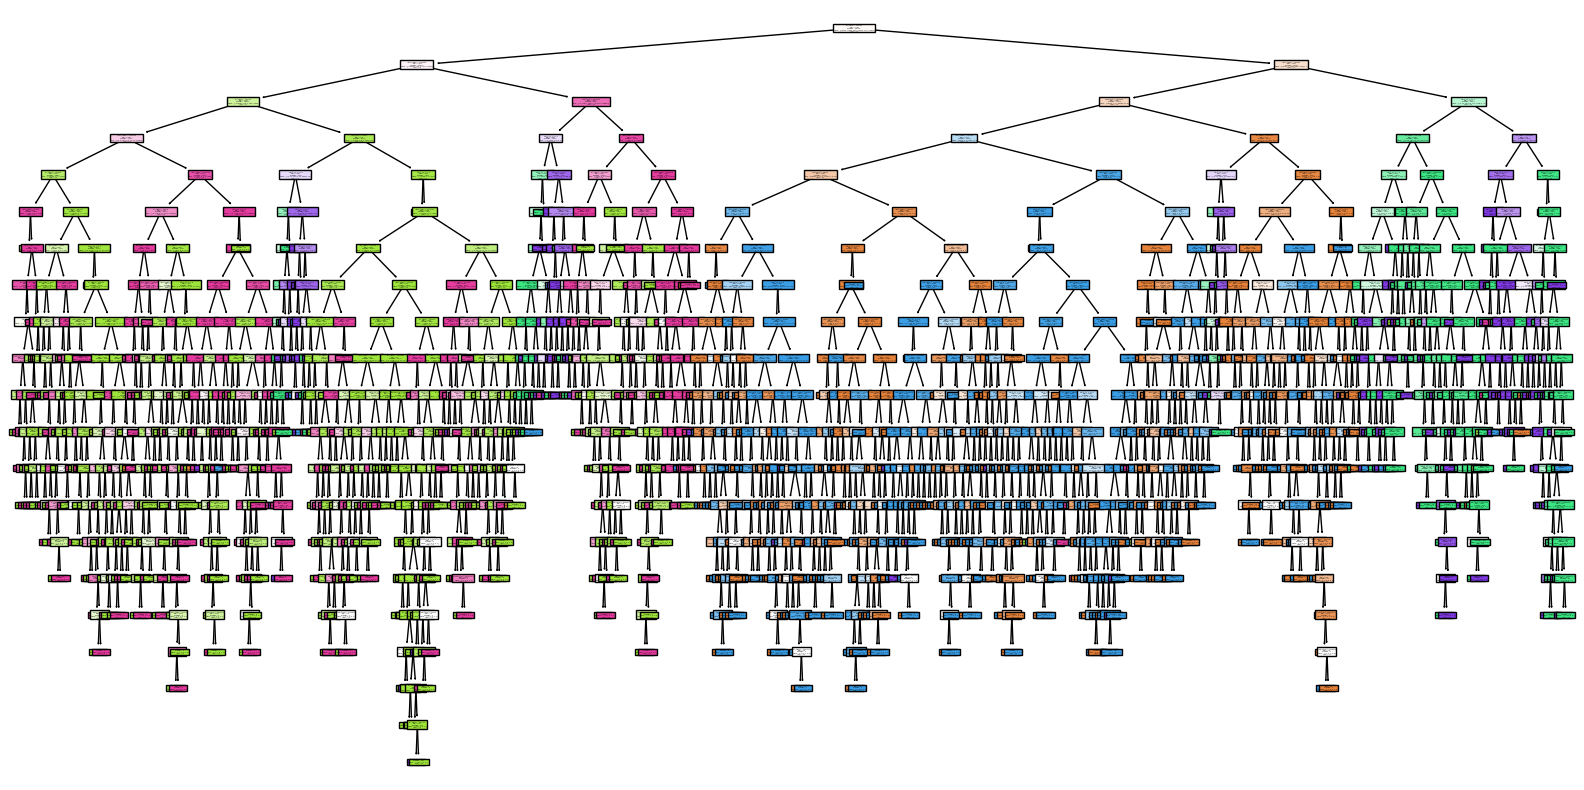

In [ ]:
# Visualize Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], filled=True)
plt.show()